# Q1.Write a program to plot the correlation plot on the dataset and visualize giving an overview of relationships among data on iris data. 

# 2.Write a program to implement CNN

create a simple CNN program using the MNIST dataset from Kaggle.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
train_data = pd.read_csv(r"C:\Users\91997\Desktop\KRAI\LAB 2\digit-recognizer\train.csv")
test_data = pd.read_csv(r"C:\Users\91997\Desktop\KRAI\LAB 2\digit-recognizer\test.csv")

# Separate features and labels
X_train = train_data.iloc[:, 1:].values.astype('float32') / 255
y_train = train_data.iloc[:, 0].values
X_test = test_data.values.astype('float32') / 255

# Reshape the data
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the test set
accuracy = model.evaluate(X_val, y_val, verbose=0)[1]
print(f'Validation Accuracy: {accuracy}')

# Make predictions on the test set
predictions = np.argmax(model.predict(X_test), axis=1)

# Save predictions to a CSV file
output = pd.DataFrame({'ImageId': range(1, len(predictions) + 1), 'Label': predictions})
output.to_csv('mnist_predictions.csv', index=False)

Epoch 1/10
1050/1050 [==============================] - 47s 42ms/step - loss: 0.2006 - accuracy: 0.9404 - val_loss: 0.0943 - val_accuracy: 0.9736
Epoch 2/10
1050/1050 [==============================] - 39s 37ms/step - loss: 0.0659 - accuracy: 0.9799 - val_loss: 0.0698 - val_accuracy: 0.9781
Epoch 3/10
1050/1050 [==============================] - 41s 39ms/step - loss: 0.0400 - accuracy: 0.9866 - val_loss: 0.0608 - val_accuracy: 0.9811
Epoch 4/10
1050/1050 [==============================] - 42s 40ms/step - loss: 0.0282 - accuracy: 0.9907 - val_loss: 0.0550 - val_accuracy: 0.9823
Epoch 5/10
1050/1050 [==============================] - 43s 41ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0620 - val_accuracy: 0.9817
Epoch 6/10
1050/1050 [==============================] - 44s 42ms/step - loss: 0.0131 - accuracy: 0.9955 - val_loss: 0.0554 - val_accuracy: 0.9844
Epoch 7/10
1050/1050 [==============================] - 39s 37ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.0617 -

# Q3 Write a program to implement RNN 

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Load IMDb dataset
max_features = 10000  # Consider the top 10,000 words
maxlen = 500  # Cut reviews after 500 words
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

# Pad sequences to have the same length
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

# Build the RNN model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the model
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)

# Evaluate the model on the test set
results = model.evaluate(input_test, y_test)
print('Test loss:', results[0])
print('Test accuracy:', results[1])


Loading data...
17464789/17464789 [==============================] - 5s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)
Epoch 1/10
625/625 [==============================] - 79s 122ms/step - loss: 0.6043 - acc: 0.6463 - val_loss: 0.4200 - val_acc: 0.8150
Epoch 2/10
625/625 [==============================] - 69s 111ms/step - loss: 0.3713 - acc: 0.8424 - val_loss: 0.3805 - val_acc: 0.8366
Epoch 3/10
625/625 [==============================] - 71s 113ms/step - loss: 0.2895 - acc: 0.8852 - val_loss: 0.3224 - val_acc: 0.8726
Epoch 4/10
625/625 [==============================] - 80s 128ms/step - loss: 0.2961 - acc: 0.8841 - val_loss: 0.3773 - val_acc: 0.8546
Epoch 5/10
625/625 [==============================] - 73s 117ms/step - loss: 0.2776 - acc: 0.8917 - val_loss: 0.3820 - val_acc: 0.8524
Epoch 6/10
625/625 [==============================] - 78s 125ms/step - loss: 0.2325 - acc: 0.9119 - val_los

C:\Users\91997\AppData\Local\Temp\ipykernel_9612\3742382265.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = iris.corr()


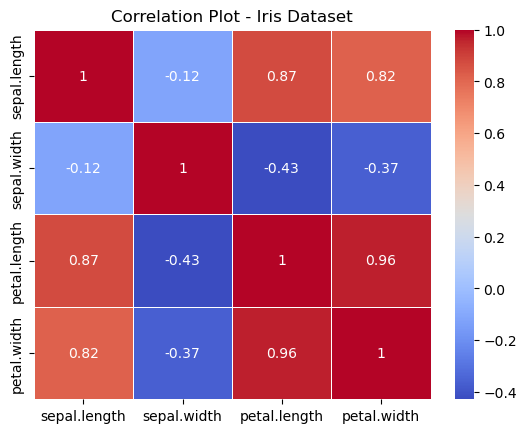

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset locally
iris = pd.read_csv(r"C:\Users\91997\Desktop\KRAI\LAB 2\iris.csv") 

# Calculate the correlation matrix
correlation_matrix = iris.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Plot - Iris Dataset')
plt.show()


# Q.4 Write a program to implement GAN 

2/2 [==============================] - 0s 38ms/step
Epoch 0, Discriminator Loss: 0.6903192400932312, Generator Loss: 0.4882219135761261
2/2 [==============================] - 0s 31ms/step
Epoch 100, Discriminator Loss: 0.6975488066673279, Generator Loss: 0.7313807010650635
2/2 [==============================] - 0s 36ms/step


2/2 [==============================] - 0s 44ms/step
Epoch 200, Discriminator Loss: 0.6324734687805176, Generator Loss: 0.7576847076416016
2/2 [==============================] - 0s 41ms/step
Epoch 300, Discriminator Loss: 0.6325124502182007, Generator Loss: 0.6836622357368469
2/2 [==============================] - 0s 31ms/step


2/2 [==============================] - 0s 40ms/step
Epoch 400, Discriminator Loss: 0.6538665890693665, Generator Loss: 0.7754472494125366
2/2 [==============================] - 0s 73ms/step


2/2 [==============================] - 0s 37ms/step
Epoch 500, Discriminator Loss: 0.6447269320487976, Generator Loss: 0.5946059823036194
2/2 [==============================] - 0s 44ms/step
Epoch 600, Discriminator Loss: 0.6614811420440674, Generator Loss: 0.8895069360733032
2/2 [==============================] - 0s 34ms/step


2/2 [==============================] - 0s 45ms/step
Epoch 700, Discriminator Loss: 0.6505470275878906, Generator Loss: 0.913799524307251
2/2 [==============================] - 0s 43ms/step


2/2 [==============================] - 0s 40ms/step
Epoch 800, Discriminator Loss: 0.6584687232971191, Generator Loss: 0.6379990577697754
2/2 [==============================] - 0s 41ms/step
Epoch 900, Discriminator Loss: 0.6562994718551636, Generator Loss: 0.8206424117088318
2/2 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 366ms/step


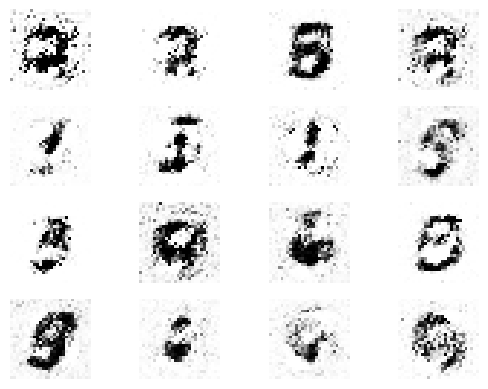

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from keras.optimizers import Adam
from keras import initializers

# Load the MNIST dataset
(X_train, _), (_, _) = mnist.load_data()

# Normalize pixel values between -1 and 1
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = X_train.reshape(X_train.shape[0], 784)

# Define the generator network
generator = Sequential()
generator.add(Dense(256, input_dim=100, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(784, activation='tanh'))
generator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Define the discriminator network
discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Define the GAN model
discriminator.trainable = False
gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Training the GAN
epochs = 1000
batch_size = 64

for epoch in range(epochs):
    noise = np.random.normal(0, 1, size=[batch_size, 100])
    generated_images = generator.predict(noise)
    image_batch = X_train[np.random.randint(0, X_train.shape[0], size=batch_size)]

    X = np.concatenate([image_batch, generated_images])
    y_dis = np.zeros(2 * batch_size)
    y_dis[:batch_size] = 0.9

    discriminator.trainable = True
    d_loss = discriminator.train_on_batch(X, y_dis)

    noise = np.random.normal(0, 1, size=[batch_size, 100])
    y_gen = np.ones(batch_size)
    discriminator.trainable = False
    g_loss = gan.train_on_batch(noise, y_gen)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}")

# Generate images using the trained generator
noise = np.random.normal(0, 1, size=[16, 100])
generated_images = generator.predict(noise)
generated_images = generated_images.reshape((16, 28, 28))

# Display the generated images
fig, axs = plt.subplots(4, 4)
count = 0
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(generated_images[count], interpolation='nearest', cmap='gray_r')
        axs[i, j].axis('off')
        count += 1
plt.show()